In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from scipy import stats


import requests
import json


In [2]:

from matplotlib import style
style.use('fivethirtyeight')

import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy.ext.declarative import declarative_base

import sqlite3

In [3]:
tool_0028AA_df= pd.read_csv("Output_data/tool_0028AA_df.csv")

In [4]:
tool_9622A_df = pd.read_csv("Output_data/tool_9622A_df.csv")

In [5]:
tool_9622C_df = pd.read_csv("Output_data/tool_9622C_df.csv")

In [6]:
tool_9238AA_df = pd.read_csv("Output_data/tool_9238AA_df.csv")

In [7]:
tool_9238CA_df = pd.read_csv("Output_data/tool_9238CA_df.csv")

In [9]:
tool_0028AA_df.columns

Index(['Unnamed: 0', 'Depth_M', 'CALIPER_MM', 'DENSITY_G/CC',
       'POR(DEN)_PERCENT', 'DENSITY_CPS', 'TENSION_CPS', 'TIME_MINUTES',
       'well', 'file', 'TIME_SECONDS', 'CALIPER_CPS', 'TENSION_POUNDS', 'ind',
       'Dataset', 'CALIPER_CM', 'TIME_NA'],
      dtype='object')

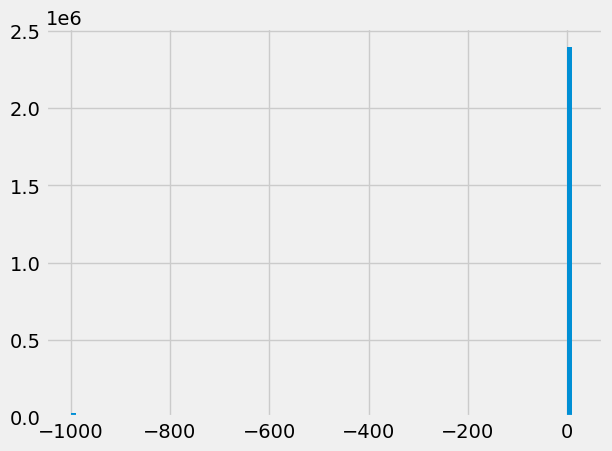

In [16]:
hist = tool_0028AA_df['DENSITY_G/CC'].hist(bins=100)

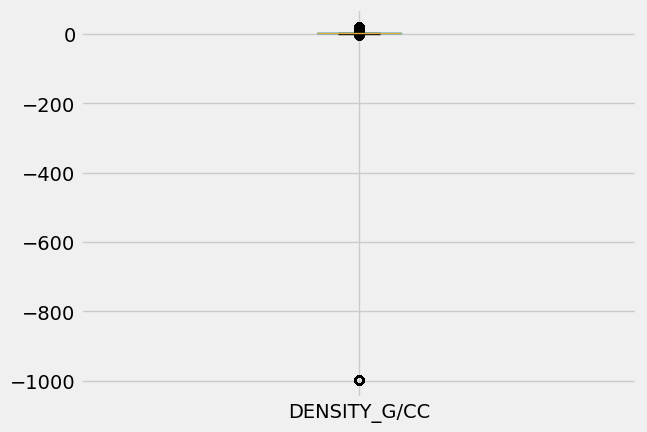

In [19]:
boxplot = tool_0028AA_df.boxplot(column=['DENSITY_G/CC'])

In [11]:
tool_9622C_df.columns

Index(['Unnamed: 0', 'Depth_M', 'GAM(NAT)_CPS', 'SUSCEP_CGS E-5', 'SANG_DEG',
       'SANGB_DEG', 'MAG-VECT_AMPL', 'XINCL_MV', 'YINCL_MV', 'XFLUX_MV',
       'YFLUX_MV', 'ZFLUX_MV', 'TEMP_DEG C', 'TEMP_CPS', 'SUSCEP_CPS',
       'TENSION_CPS', 'TIME_MINUTES', 'well', 'file', 'TEMP_DEG', 'ind',
       'Dataset', 'TIME_SECONDS', 'TIME_NA'],
      dtype='object')

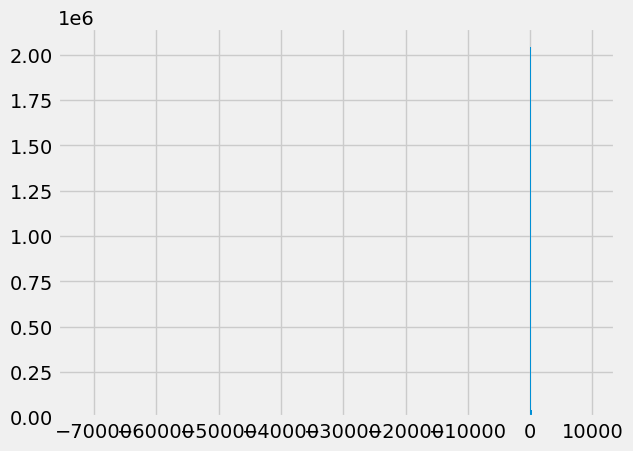

In [17]:
hist = tool_9622C_df['SUSCEP_CGS E-5'].hist(bins=1000)

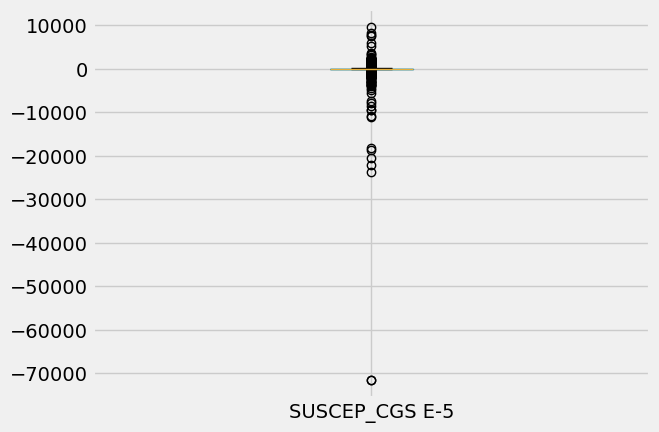

In [20]:
boxplot = tool_9622C_df.boxplot(column=['SUSCEP_CGS E-5'])

In [21]:
tool_9622C_df.columns

Index(['Unnamed: 0', 'Depth_M', 'GAM(NAT)_CPS', 'SUSCEP_CGS E-5', 'SANG_DEG',
       'SANGB_DEG', 'MAG-VECT_AMPL', 'XINCL_MV', 'YINCL_MV', 'XFLUX_MV',
       'YFLUX_MV', 'ZFLUX_MV', 'TEMP_DEG C', 'TEMP_CPS', 'SUSCEP_CPS',
       'TENSION_CPS', 'TIME_MINUTES', 'well', 'file', 'TEMP_DEG', 'ind',
       'Dataset', 'TIME_SECONDS', 'TIME_NA'],
      dtype='object')

In [ ]:
boxplot = tool_9622C_df.boxplot(column=['SUSCEP_CGS E-5'])

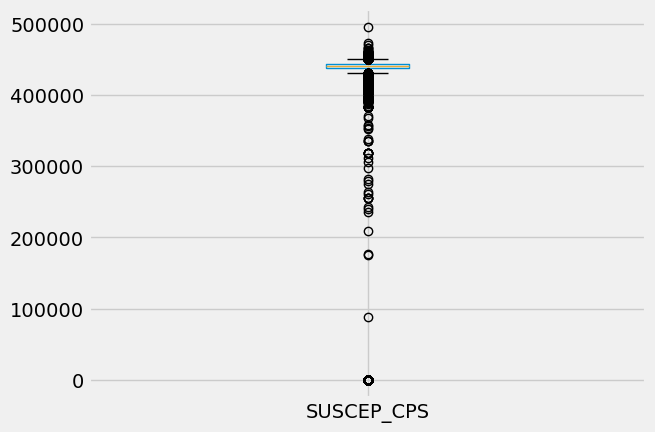

In [22]:
boxplot = tool_9622C_df.boxplot(column=['SUSCEP_CPS'])

In [24]:
tool_9622C_df.describe()

,Unnamed: 0,Depth_M,GAM(NAT)_CPS,SUSCEP_CGS E-5,SANG_DEG,SANGB_DEG,MAG-VECT_AMPL,XINCL_MV,YINCL_MV,XFLUX_MV,...,ZFLUX_MV,TEMP_DEG C,TEMP_CPS,SUSCEP_CPS,TENSION_CPS,TIME_MINUTES,TEMP_DEG,ind,TIME_SECONDS,TIME_NA
count,2.415752e+06,2.415752e+06,2.415752e+06,2.415752e+06,2.415752e+06,2.415752e+06,2.415752e+06,2.415752e+06,2.415752e+06,2.415752e+06,...,2.415752e+06,2.415752e+06,2.415752e+06,2.415752e+06,2.261058e+06,2.248645e+06,0.0,2.415752e+06,154247.000000,12860.000000
mean,6.686329e+05,1.994087e+01,-4.139498e+25,-3.165541e+01,-5.706406e+01,1.022432e+02,-5.671919e+01,-5.778935e+01,-5.779180e+01,-5.781874e+01,...,-5.868164e+01,2.895498e+02,2.440655e+05,3.871128e+05,7.038570e+01,-5.763309e+01,NaN,6.686339e+05,-53.320906,-55.357816
std,4.430545e+05,1.377854e+01,6.433893e+28,2.669501e+02,2.334388e+02,2.906740e+02,2.335237e+02,2.332585e+02,2.332579e+02,2.332225e+02,...,2.330083e+02,1.341104e+03,1.274008e+05,1.431742e+05,1.879442e+02,2.346361e+02,NaN,4.430545e+05,226.443243,230.393007
min,0.000000e+00,-4.000000e+00,-1.000000e+32,-7.165895e+04,-9.992500e+02,-9.992500e+02,-9.992500e+02,-9.992500e+02,-9.992500e+02,-9.992500e+02,...,-9.992500e+02,-9.992500e+02,-9.992500e+02,-9.992500e+02,-1.000000e+01,-9.992500e+02,NaN,1.000000e+00,-999.250000,-999.250000
25%,3.012638e+05,8.800000e+00,2.600000e+01,6.065457e+00,3.472941e-01,6.914613e+01,1.012194e+00,-4.623112e-03,-7.226547e-03,-5.139692e-01,...,-1.191668e+00,2.497974e+01,3.000200e+05,4.386275e+05,-1.000000e+01,7.000000e-01,NaN,3.012648e+05,0.700000,0.700000
50%,6.032325e+05,1.780000e+01,5.000000e+01,9.689900e+00,6.257015e-01,1.439195e+02,1.094515e+00,2.501231e-03,9.693819e-05,-1.099640e-01,...,-9.217238e-01,7.893163e+01,3.077700e+05,4.413510e+05,-1.000000e+01,8.000000e-01,NaN,6.032335e+05,0.800000,0.700000
75%,1.000711e+06,2.900000e+01,8.000000e+01,1.933768e+01,1.003252e+00,2.572409e+02,1.285663e+00,9.085568e-03,6.319575e-03,3.638562e-01,...,-8.250568e-01,8.651903e+01,3.113300e+05,4.432872e+05,-1.000000e+01,9.000001e-01,NaN,1.000712e+06,0.900000,0.800000
max,1.604649e+06,8.600000e+01,1.019880e+05,9.555960e+03,7.977442e+01,3.599996e+02,4.762047e+00,9.585743e-01,1.433376e+00,3.643032e+00,...,2.838358e+00,5.695623e+03,3.741333e+05,4.957700e+05,7.222000e+02,1.354751e+03,NaN,1.604650e+06,163.287308,107.585052
